In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import shuffle
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [2]:
x_train = pd.read_csv(r"C:\Users\pc\Documents\DSBD\S3\DL\csvTrainImages 13440x1024.csv",header=None)
y_train = pd.read_csv(r"C:\Users\pc\Documents\DSBD\S3\DL\csvTrainLabel 13440x1.csv",header=None)

x_test = pd.read_csv(r"C:\Users\pc\Documents\DSBD\S3\DL\csvTestImages 3360x1024.csv",header=None)
y_test = pd.read_csv(r"C:\Users\pc\Documents\DSBD\S3\DL\csvTestLabel 3360x1.csv",header=None)

In [3]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()-1

x_test = x_test.to_numpy()
y_test = y_test.to_numpy()-1

In [4]:
print('Train Data Size',x_train.shape,y_train.shape)
print('Test Data Size',x_test.shape,y_test.shape)

Train Data Size (13440, 1024) (13440, 1)
Test Data Size (3360, 1024) (3360, 1)


In [5]:
x_train = x_train.reshape(-1,32,32)
x_test = x_test.reshape(-1,32,32)
x_train = x_train/255
x_test = x_test/255
# for some reason the images are flipped and rotated
# so we transpose each image to be in the correct shape
x_train = np.array([image.T for image in x_train])
x_test = np.array([image.T for image in x_test])

# shuffle
x_train, y_train = shuffle(x_train, y_train)
x_test, y_test = shuffle(x_test, y_test)

print(x_train.shape, x_test.shape)

(13440, 32, 32) (3360, 32, 32)


#### 1024 pixels which mean 32 x 32

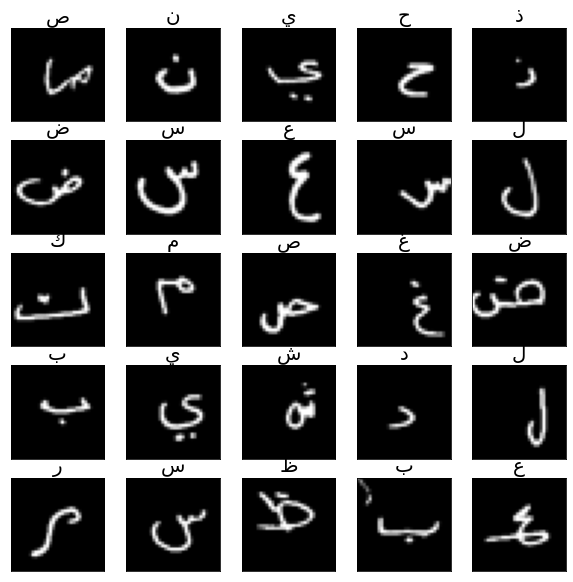

In [6]:
# set the arabic alphabet
arabic_chars =list('ابتثجحخدذرزسشصضطظعغفقكلمنهوي')
arabic_chars

ra = np.random.randint(0, 13440, size=25)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[ra[i]].reshape(32,32),"gray")
    plt.title(arabic_chars[int(y_train[ra[i]][0])], fontsize = 20)
plt.show()

In [7]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

y_train_h = to_categorical(y_train)
y_test_h = to_categorical(y_test)

print(y_train.shape, y_test.shape)
print(y_train_h.shape, y_test_h.shape)

(13440,) (3360,)
(13440, 28) (3360, 28)


In [8]:
x_train = x_train.reshape(-1,32,32, 1)
x_test = x_test.reshape(-1,32,32, 1)

train_datagen=ImageDataGenerator(
    #rescale=1/255, # Normalize the new images
    zoom_range=0.2, #the amount of zooming u need
    width_shift_range=0.10, # The percentage of Width shifitning
    height_shift_range=0.10, # The percentage of height shifitning
    shear_range=0.1, #Shear angle in counter-clockwise direction in degrees
    fill_mode='nearest',
#     rotation_range=20, 
)
train_generator=train_datagen.flow(
    x_train ,y_train ,batch_size=64
)

test_datagen=ImageDataGenerator()

test_generator=test_datagen.flow(
    x_test ,y_test ,batch_size=64
 
)

In [9]:
earlystop = EarlyStopping(patience=6)
learning_rate_reduction=ReduceLROnPlateau(
    monitor='val_accuracy',
    patience= 3,
    verbose=1,
)
callbacks = [earlystop, learning_rate_reduction]

In [10]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(256,(5,5),activation='relu',input_shape=(32,32,1)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(128,(5,5),activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(28, kernel_regularizer=keras.regularizers.l2(0.01) ,activation='softmax'))

In [11]:
model.compile(optimizer= 'adam' ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 256)       6656      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 128)       819328    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 128)         0         
                                                                 
 flatten (Flatten)           (None, 3200)              0

In [13]:
model.fit(
    train_generator, 
    epochs=100,
    validation_data=test_generator,
    callbacks=callbacks
)

Epoch 1/100
210/210 [==============================] - 117s 554ms/step - loss: 2.0838 - accuracy: 0.4183 - val_loss: 0.8156 - val_accuracy: 0.7818 - lr: 0.0010
Epoch 2/100
210/210 [==============================] - 117s 555ms/step - loss: 1.0237 - accuracy: 0.7106 - val_loss: 0.5482 - val_accuracy: 0.8604 - lr: 0.0010
Epoch 3/100
210/210 [==============================] - 131s 625ms/step - loss: 0.7824 - accuracy: 0.7839 - val_loss: 0.4890 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 4/100
210/210 [==============================] - 127s 602ms/step - loss: 0.6681 - accuracy: 0.8162 - val_loss: 0.3980 - val_accuracy: 0.9122 - lr: 0.0010
Epoch 5/100
210/210 [==============================] - 133s 634ms/step - loss: 0.5829 - accuracy: 0.8428 - val_loss: 0.3710 - val_accuracy: 0.9134 - lr: 0.0010
Epoch 6/100
210/210 [==============================] - 128s 609ms/step - loss: 0.5311 - accuracy: 0.8641 - val_loss: 0.2871 - val_accuracy: 0.9440 - lr: 0.0010
Epoch 7/100
210/210 [===================

210/210 [==============================] - 149s 708ms/step - loss: 0.2817 - accuracy: 0.9356 - val_loss: 0.1915 - val_accuracy: 0.9693 - lr: 1.0000e-13
Epoch 42/100
210/210 [==============================] - 149s 711ms/step - loss: 0.2786 - accuracy: 0.9348 - val_loss: 0.1915 - val_accuracy: 0.9693 - lr: 1.0000e-13
Epoch 43/100
210/210 [==============================] - ETA: 0s - loss: 0.2755 - accuracy: 0.9368
Epoch 43: ReduceLROnPlateau reducing learning rate to 1.0000001179769417e-14.
210/210 [==============================] - 149s 708ms/step - loss: 0.2755 - accuracy: 0.9368 - val_loss: 0.1915 - val_accuracy: 0.9693 - lr: 1.0000e-13


<AxesSubplot:>

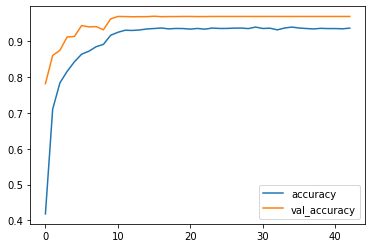

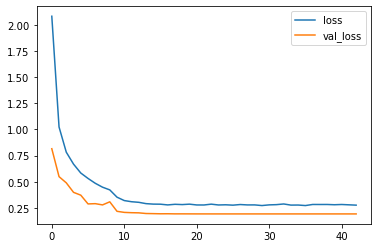

In [14]:
losses = pd.DataFrame(model.history.history)
losses[['accuracy','val_accuracy']].plot()
losses[['loss','val_loss']].plot()

In [15]:
model.evaluate(test_generator)

53/53 [==============================] - 9s 166ms/step - loss: 0.1915 - accuracy: 0.9693


[0.19151048362255096, 0.969345211982727]

In [16]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)
print(pred)

105/105 [==============================] - 10s 90ms/step
[27 10 11 ... 17 18 10]


Text(0.5, 1.0, 'س')

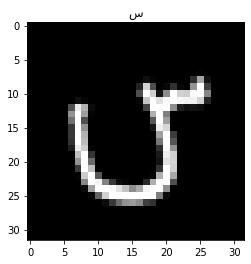

In [22]:
plt.imshow(x_test[2].reshape(32,32),"gray")
plt.title(arabic_chars[pred[2]])

In [ ]:
model.save('arabic_alphabet_model.h5')